# Data Analysis - Travel Destinations

In this notebook, we explore and construct a travel destination model: each travel destination is given different features in order to help the customer make a travel plan suitable to their likings.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

## Obtaining a list of popular destinations
First we need a list of destinations. We choose the list of destinations of the 5 most popular airlines in the UK - British Airways (BA), EasyJet, Ryanair, Emirates and Etihad Airways. This data is public and can be retrived from Wikipedia: 

British Airways:
https://en.wikipedia.org/wiki/List_of_British_Airways_destinations,

Easyjet:
https://en.wikipedia.org/wiki/List_of_EasyJet_destinations,

Ryanair:
https://en.wikipedia.org/wiki/List_of_Ryanair_destinations,

Emirates:
https://en.wikipedia.org/wiki/List_of_Emirates_destinations,

Etihad Airways
https://en.wikipedia.org/wiki/List_of_Etihad_Airways_destinations.

In [57]:
# loading destinations datasets
ba_destinations = pd.read_csv('./travel_destinations_data/ba_destinations.csv')
ej_destinations = pd.read_csv('./travel_destinations_data/easyjet_destinations.csv')
ra_destinations = pd.read_csv('./travel_destinations_data/ryanair_destinations.csv')
em_destinations = pd.read_csv('./travel_destinations_data/em_destinations.csv')
et_destinations = pd.read_csv('./travel_destinations_data/et_destinations.csv')
qa_destinations = pd.read_csv('./travel_destinations_data/qa_destinations.csv')
qt_destinations = pd.read_csv('./travel_destinations_data/qa_destinations.csv')

In [58]:
# we drop all destinations that has been terminated (note: easyjet destinations excludes terminated)
ba_destinations.drop(index=ba_destinations[ba_destinations['Notes'] == 'Terminated'].index, inplace=True)
ra_destinations.drop(index=ra_destinations[ra_destinations['Notes'] == 'Terminated'].index, inplace=True)
em_destinations.drop(index=em_destinations[em_destinations['Notes'] == 'Terminated'].index, inplace=True)
et_destinations.drop(index=et_destinations[et_destinations['Notes'] == 'Terminated'].index, inplace=True)
qa_destinations.drop(index=qa_destinations[qa_destinations['Notes'] == 'Terminated'].index, inplace=True)
qt_destinations.drop(index=qt_destinations[qt_destinations['Notes'] == 'Terminated'].index, inplace=True)
ba_destinations.reset_index(drop=True)
ra_destinations.reset_index(drop=True)
em_destinations.reset_index(drop=True)
et_destinations.reset_index(drop=True)
qa_destinations.reset_index(drop=True)
qt_destinations.reset_index(drop=True)

# create a list of all countries and cities from the five airlines
all_destinations = []
for i in range(ba_destinations.shape[0]):
    all_destinations.append([
        ba_destinations.iloc[i]['Country'],
        ba_destinations.iloc[i]['City']
    ])

for i in range(ej_destinations.shape[0]):
    destination = [ej_destinations.iloc[i]['Country'], ej_destinations.iloc[i]['City']]
    if destination not in all_destinations:
        all_destinations.append(destination)
    else:
        continue

for i in range(ra_destinations.shape[0]):
    destination = [ra_destinations.iloc[i]['Country'], ra_destinations.iloc[i]['City']]
    if destination not in all_destinations:
        all_destinations.append(destination)
    else:
        continue
        
for i in range(em_destinations.shape[0]):
    destination = [em_destinations.iloc[i]['Country'], em_destinations.iloc[i]['City']]
    if destination not in all_destinations:
        all_destinations.append(destination)
    else:
        continue
        
for i in range(et_destinations.shape[0]):
    destination = [et_destinations.iloc[i]['Country'], et_destinations.iloc[i]['City']]
    if destination not in all_destinations:
        all_destinations.append(destination)
    else:
        continue

for i in range(qa_destinations.shape[0]):
    destination = [qa_destinations.iloc[i]['Country'], qa_destinations.iloc[i]['City']]
    if destination not in all_destinations:
        all_destinations.append(destination)
    else:
        continue

for i in range(qt_destinations.shape[0]):
    destination = [qt_destinations.iloc[i]['Country'], qt_destinations.iloc[i]['City']]
    if destination not in all_destinations:
        all_destinations.append(destination)
    else:
        continue
# converting our list of destinations into a dataframe
dest_df = pd.DataFrame(all_destinations)
dest_df.columns=['Country','City']
dest_df.sort_values(by=['Country', 'City'], ascending=[True, True], inplace=True)
dest_df.drop_duplicates(inplace=True)

# reorganise dataset
dest_df.reset_index(inplace=True)
dest_df.drop(columns='index', inplace=True)
number_of_destinations = len(dest_df)
print(f'Number of destinations: {number_of_destinations}')
pd.set_option('display.max_rows', number_of_destinations)
dest_df.head(5)

Number of destinations: 483


,Country,City
0,Afghanistan,Kabul
1,Albania,Tirana
2,Algeria,Algiers
3,Angola,Luanda
4,Antigua and Barbuda,St. John's


One important factor to take into account when recommanding travel plan is how far the destination is. This also affect flight prices and budget. Here we add the co-ordinates of each city using open data from World Cities Database: https://simplemaps.com/data/world-cities. 

In [59]:
# loading world cities coordinates database
coords_data = pd.read_csv('./travel_destinations_data/worldcities.csv')
coords_data.reset_index(inplace=True)
all_destinations = dest_df.values.tolist()
all_cities_coords=[]
# adding coordinates by iterating through the list
no_data_cities=[]
for country, city in all_destinations:
    filt = (coords_data['city_ascii'] == city) & (coords_data['country'] == country)
    series = coords_data.loc[filt]
    series.reset_index(inplace=True)
    try:
        # note: store location data as string
        city_coords = str(series.loc[0, 'lat']) + ', ' + str(series.loc[0, 'lng'])
    except KeyError:
        filt = (coords_data['city'] == city) & (coords_data['country'] == country)
        series = coords_data.loc[filt]
        series.reset_index(inplace=True)
        try:
            city_coords = str(series.loc[0, 'lat']) + ', ' + str(series.loc[0, 'lng'])
        except:
            no_data_cities.append(city)
            city_coords = 'unknown'
    all_cities_coords.append(city_coords)
print(f'Destinations with no location data: {no_data_cities}')
dest_df['Location'] = all_cities_coords
# delete all rows with unknown coordinates
# these places are not popular enough to be on our list of destinations!
dest_df = dest_df[dest_df.Location != 'unknown']
dest_df.reset_index(inplace=True)
dest_df.drop(columns='index', inplace=True)
number_of_destinations = len(dest_df)
print(f'Number of destinations: {number_of_destinations}')
pd.set_option('display.max_rows', number_of_destinations)
dest_df.head(5)

Destinations with no location data: ['Banja Luka', 'Sarajevo', 'Hong Kong', 'Beijing', 'Chengdu', 'Chongqing', 'Guangzhou', 'Hangzhou', 'Shanghai', 'Prague', 'Billund', 'Djibouti City', 'Punta Cana', 'Hurghada', 'Marsa Alam', 'Sharm El Sheikh', 'Bergerac', 'Calvi', 'Carcassonne', 'Chambéry', 'Dole', 'Figari', 'Lourdes Tarbes', 'Rodez', 'Saint-Malo Dinard', 'Cologne Bonn', 'Friedrichshafen', 'Hahn', 'Hanover', 'Karlsruhe Baden-Baden', 'Memmingen', 'Sylt', 'Corfu', 'Heraklion', 'Kefalonia', 'Mykonos', 'Mykonos Island', 'Preveza/Lefkada', 'Rhodes', 'Santorini', 'Zakynthos', 'Hong Kong', 'Ahmedabad', 'Bengaluru', 'Goa', 'Kozhikode', 'Isfahan', 'Basra', 'Najaf', 'Sulaymaniyah', 'Kerry', 'Knock', 'Isle of Man', 'Eilat', 'Alghero', 'Comiso', 'Cuneo', 'Lamezia Terme', 'Rimini', 'Trapani', 'Abidjan', 'Jersey', 'Aqaba', 'Pristina', 'Luxembourg City', 'Macau', 'Langkawi', 'Penang', 'Malé', 'Malta', 'Valletta Luqa', 'Mahébourg', 'Essaouira', 'Fez', 'Marrakesh', 'Nador', 'Ouarzazate', 'Oujda', 'Yan

,Country,City,Location
0,Afghanistan,Kabul,"34.5167, 69.1833"
1,Albania,Tirana,"41.3275, 19.8189"
2,Algeria,Algiers,"36.7631, 3.0506"
3,Angola,Luanda,"-8.8383, 13.2344"
4,Antigua and Barbuda,St. John's,"17.118, -61.85"


## Plotting Travel Destinations on a World Map
Please note: running this section requires Basemap installed under current virtual environment (if any).

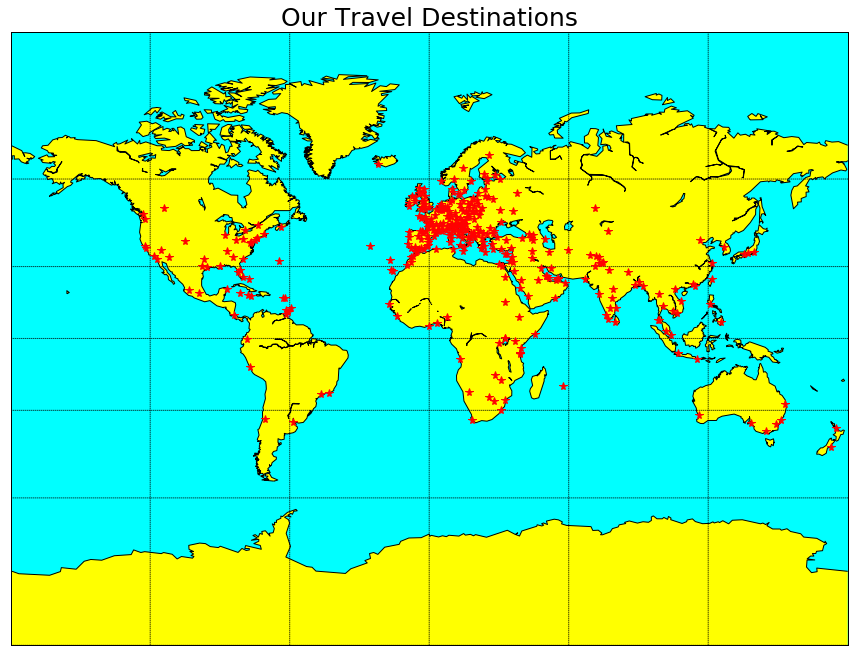

In [60]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(15, 20))
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='yellow', lake_color='aqua')
m.drawparallels(np.arange(-90., 91.,30.))
m.drawmeridians(np.arange(-180., 181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Our Travel Destinations", size=25)
dest_to_plot = dest_df.values.tolist()
for i in dest_to_plot:
    lat, lng = i[2].split(', ')
    x, y = m(float(lng), float(lat))  # idk why but Basemap takes in latitude first
    m.plot(x, y, '*', color='red', markersize=8)
plt.show()

## Adding features to the destinations
There are many things people consider when choosing a holiday destination. Here we select a few popular factors people usually take into cosideration: 

*Cost*

*History and Culture*

*Water view*

*Mountain view*

*Nightlife and Entertainment*


### Cost
We use cost-of-living index to assign each destination with a 'Cost' feature value. This index was developed by Russian economist A. A. Konüs and measures differences in the price of goods and services, and allows for substitutions with other items as prices vary. (Source: Wikipedia)
As different cities in a country has slightly different cost-of-living, we first try to assign the'Cost' feature using the cost-of-living index of indicidual city, then we fill the unassigned destination with the cost-of-living index of their respective country. It is worth noting that the calculation of the index is done in the same way in cities or countries hence they are comparable.
Source: https://www.numbeo.com/cost-of-living/rankings.jsp; https://www.numbeo.com/cost-of-living/rankings_by_country.jsp. Data retrived 19 Aug 2020.

In [61]:
all_destinations = dest_df.values.tolist()
# loading the public datasets from numbeo
coi_by_city = pd.read_csv('./travel_destinations_data/cost_of_living_index_by_cities_2020.csv')
coi_by_country = pd.read_csv('./travel_destinations_data/cost_of_living_index_by_country_2020.csv')
all_coi = []
no_data_countries = []
for item in all_destinations:
    filt = coi_by_city.City.str.contains(pat=item[1])
    series = coi_by_city.loc[filt]
    series.reset_index(inplace=True)
    try:
        coi = series.loc[0, 'Cost of Living Index']
    except KeyError:
        filt2 = coi_by_country.Country.str.contains(pat=item[0])
        series2 = coi_by_country.loc[filt2]
        series2.reset_index(inplace=True)
        try:
            coi = series2.loc[0, 'Cost of Living Index']
        except KeyError:
            no_data_countries.append(item[0])
            coi = 'unknown'
    all_coi.append(coi)

# we had to abandon the destination with cost data
print('Countries with no data:', no_data_countries)

Countries with no data: ['Angola', 'Antigua and Barbuda', 'Cayman Islands', 'Gibraltar', 'Grenada', 'Guinea', 'Saint Kitts and Nevis', 'Senegal', 'Sudan', 'Zambia']


To make sure all features are in a suitable scale, we need to normalise the values. Here we define a helper function to return the feature value between 0 and 100. In some cases where there are outliers too high, it might be useful to use a sigmoid transformation on data.

In [62]:
def normalise_feature(max_val, min_val, val):
    if type(val) != str:
        return (val - min_val) / (max_val - min_val) * 100
    else:
        return 'unknown'
    
def sigmoid(c1, c2, x):
    if type(val) != str:
        return 1/(1+(math.exp(-(x-c2)))) * 100
    else:
        return 'unknown'

In [63]:
# calculate normalised cost
max_cost = max([i for i in all_coi if not isinstance(i, str)])
min_cost = min([i for i in all_coi if not isinstance(i, str)])
all_coi_normalised = []
for val in all_coi:
    all_coi_normalised.append(normalise_feature(max_cost, min_cost, val))

In [64]:
# updating dataframe
dest_df['Cost'] = all_coi_normalised
# reorganise
dest_df = dest_df[dest_df.Cost != 'unknown']
dest_df.reset_index(inplace=True)
dest_df.drop(columns='index', inplace=True)
number_of_destinations = len(dest_df)
print(f'Number of destinations: {number_of_destinations}')
pd.set_option('display.max_rows', number_of_destinations)
dest_df.head(5)

Number of destinations: 353


,Country,City,Location,Cost
0,Afghanistan,Kabul,"34.5167, 69.1833",6.45769
1,Albania,Tirana,"41.3275, 19.8189",18.1116
2,Algeria,Algiers,"36.7631, 3.0506",10.6279
3,Argentina,Buenos Aires,"-34.6025, -58.3975",11.268
4,Armenia,Gyumri,"40.7894, 43.8475",13.0472


### Culture and History
It is hard to find a way to quantise how much culture or history a city is. Here we use the UNESCO data of World Heritage Convention heritage sites to help us establish a scale - in general, an area with more cultural heritage is more likely to be considered 'cultured' by tourist. However, please note that strictly speaking this is very discreet way of measuring and some people may consider areas with few heritage 'cultured' and vice versa.

Data retrived from https://www.kaggle.com/ujwalkandi/notebook?select=whc-sites-2019.csv on 20 Aug 2020.

In [65]:
# loading World Heritage Sites data
whc_data = pd.read_csv('./travel_destinations_data/whc-sites-2019.csv')
whc_cultural = whc_data[whc_data.category != 'Natural']
print(f'There are {len(whc_cultural)} cultural/mixed world heritages.')
# we extract the coordinates of the WHC sites
whc_coords = []
for i in range(len(whc_cultural)):
    lng, lat = whc_cultural.iloc[i]['longitude'], whc_cultural.iloc[i]['latitude']
    whc_coords.append([lng, lat])

There are 908 cultural/mixed world heritages.


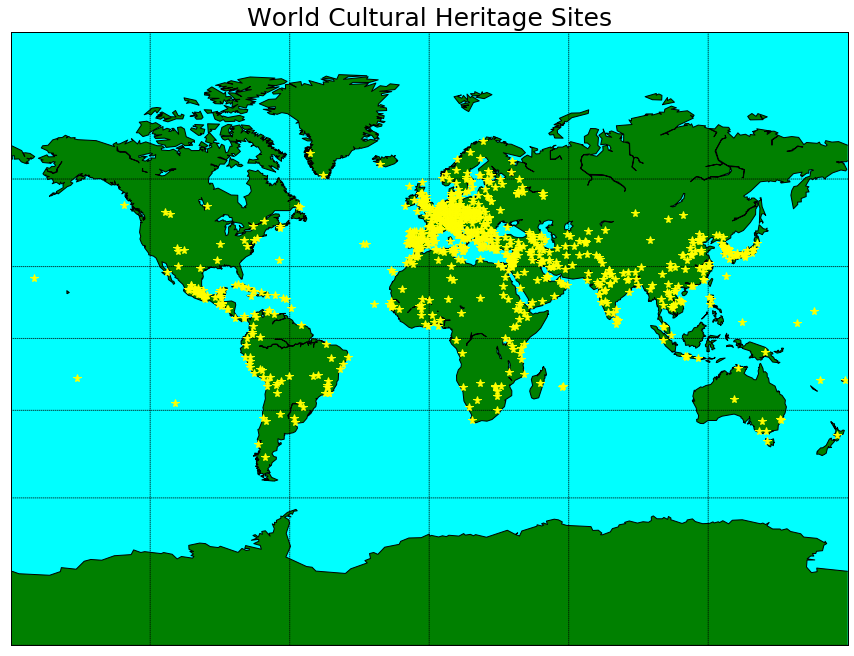

In [66]:
# we can see these sites on a world map
plt.figure(figsize=(15, 20))
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='green', lake_color='aqua')
m.drawparallels(np.arange(-90., 91.,30.))
m.drawmeridians(np.arange(-180., 181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("World Cultural Heritage Sites", size=25)
for i in whc_coords:
    lat, lng = i[1], i[0]
    x, y = m(float(lng), float(lat))  # idk why but Basemap takes in latitude first
    m.plot(x, y, '*', color='yellow', markersize=8)
plt.show()

In [67]:
# devise an algorithm to determine how many sites are in proximity to our destinations
all_destinations = dest_df.values.tolist()
all_nearby_sites = []
for i in all_destinations:
    lat, lng = i[2].split(', ')
    lat, lng = float(lat), float(lng)
# an approximation for 1 degree of longitude = cos(latitude)*degree length of longitude at the equator.
# 1 degree equals 69 miles on the equator. We use this as a standard range.
    lat_upper, lat_lower = lat + 1, lat - 1
    lng_upper, lng_lower = lng + 1/math.cos(math.pi/180*lat), lng - 1/math.cos(math.pi/180*lat)
    nearby_sites = 0
    for j in whc_coords:
        if j[0] > lng_lower and j[0] < lng_upper and j[1] > lat_lower and j[1] < lat_upper:
            nearby_sites += 1
    all_nearby_sites.append(nearby_sites)
# we discovered that a normalised transform on this data will have very high variance as there are some outliers
med_num_sites = statistics.median(all_nearby_sites)
print(f'The median number of sites around each city is {med_num_sites}.')
# here we use a sigmoid transform to counter the outliers
all_nearby_sites_sigmoid = []
for val in all_nearby_sites:
    all_nearby_sites_sigmoid.append(sigmoid(1, med_num_sites, val))

The median number of sites around each city is 2.


In [68]:
# updating dataframe
dest_df['History_and_Culture'] = all_nearby_sites_sigmoid
# reorganise
dest_df = dest_df[dest_df.History_and_Culture != 'unknown']
dest_df.reset_index(inplace=True)
dest_df.drop(columns='index', inplace=True)
number_of_destinations = len(dest_df)
print(f'Number of destinations: {number_of_destinations}')
pd.set_option('display.max_rows', number_of_destinations)
dest_df.head(5)

Number of destinations: 353


/home/sihao/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Country,City,Location,Cost,History_and_Culture
0,Afghanistan,Kabul,"34.5167, 69.1833",6.45769,11.920292
1,Albania,Tirana,"41.3275, 19.8189",18.1116,26.894142
2,Algeria,Algiers,"36.7631, 3.0506",10.6279,50.000000
3,Argentina,Buenos Aires,"-34.6025, -58.3975",11.268,26.894142
4,Armenia,Gyumri,"40.7894, 43.8475",13.0472,88.079708


### Nature
Nature is an important factor people take into consideration. In general people go to the seaside for holidays or mountains for a hike. We construct two features: sea view and mountain view.
#### Water view
This can be rated by a city's distance to open water. The coastline coordinates can be extracted from Basemap's .drawcoastline() method, and distance is calculated in miles.
Note: the higher the map resolution, the longer it takes to process and the more accurate data will be. Resolution can take values 'c'(crude), 'l'(low), 'i'(intermediate), 'h'(high) and 'f'(Full).
To process high definition coastline, it takes 15 min 34 secs on Intel i7-8565U.

100%|██████████| 1162763/1162763 [00:01<00:00, 724539.12it/s]


1162763


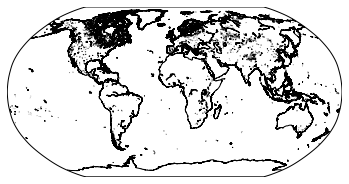

In [69]:
m = Basemap(projection='robin',lon_0=0,resolution='h')
coast = m.drawcoastlines()
coordinates = np.vstack(coast.get_segments())
coordinates = m(coordinates[:,0],coordinates[:,1],inverse=True)
coast_coordinates = []
# extract coastal coordinates data from Basemap
from tqdm import tqdm
for i in tqdm(range(len(coordinates[1]))):
    # lng, lat
    coast_coordinates.append([coordinates[0][i], coordinates[1][i]])
print(len(coast_coordinates))
# a helper function for calculating distance to open water
def coastal_distance(lng, lat, coast_coordinates):
    min_distance = 99999999
    for i in range(len(coast_coordinates)):
        distance = math.sqrt((((lng - coast_coordinates[i][0]) * (1/math.cos(math.pi/180*lat)))*69)**2 + ((lat - coast_coordinates[i][1])*69)**2)
        if distance < min_distance:
                    min_distance = distance
    return min_distance

In [70]:
all_destinations = dest_df.values.tolist()
all_distance_to_coast = []
for i in tqdm(all_destinations):
    lat, lng = i[2].split(', ')
    lat, lng = float(lat), float(lng)
    all_distance_to_coast.append(coastal_distance(lng, lat, coast_coordinates))

100%|██████████| 353/353 [12:30<00:00,  2.13s/it]


In [71]:
all_coast_score = []
for distance in all_distance_to_coast:
    if distance < 10:
        all_coast_score.append(100)
    elif distance > 10 and distance < 20:
        all_coast_score.append(75)
    elif distance > 20 and distance < 30:
        all_coast_score.append(50)
    elif distance > 30 and distance < 50:
        all_coast_score.append(25)
    else:
        all_coast_score.append(0)

In [72]:
# updating dataframe
dest_df['Water'] = all_coast_score
# reorganise
dest_df = dest_df[dest_df.Water != 'unknown']
dest_df.reset_index(inplace=True)
dest_df.drop(columns='index', inplace=True)
number_of_destinations = len(dest_df)
print(f'Number of destinations: {number_of_destinations}')
pd.set_option('display.max_rows', number_of_destinations)
dest_df.head(5)

Number of destinations: 353


/home/sihao/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Country,City,Location,Cost,History_and_Culture,Water
0,Afghanistan,Kabul,"34.5167, 69.1833",6.45769,11.920292,0
1,Albania,Tirana,"41.3275, 19.8189",18.1116,26.894142,50
2,Algeria,Algiers,"36.7631, 3.0506",10.6279,50.000000,100
3,Argentina,Buenos Aires,"-34.6025, -58.3975",11.268,26.894142,100
4,Armenia,Gyumri,"40.7894, 43.8475",13.0472,88.079708,50


#### Mountain view
Here we use the Jawg Maps Elevation API enquire (inquire?) altitude of the destination. 
Documentations and Terms can be found at:
https://www.jawg.io/docs/apidocs/elevation/#elevation-values.

Note: running this cell requires internet access. JAWG allows up to 10,000 elevation enquiries per month for free but you should get your API key and support their business!

In [73]:
def generate_5_coords(centre_coords):
    # this function generates 4 geographic coordinates 
    # to the north, south, west and east of the centre
    # at a distance of 34.5 miles (0.5 degree at equator)
    centre_lat, centre_lng = centre_coords.split(', ')
    centre_lat, centre_lng = float(centre_lat), float(centre_lng)
    east_lat, east_lng = centre_lat, centre_lng + 0.5/math.cos(math.pi/180*centre_lat)
    west_lat, west_lng = centre_lat, centre_lng - 0.5/math.cos(math.pi/180*centre_lat)
    north_lat, north_lng = centre_lat + 1, centre_lng
    south_lat, south_lng = centre_lat - 1, centre_lng
    ewcns = [str(east_lat) + ',' + str(east_lng),
          str(west_lat) + ',' + str(west_lng), 
          str(centre_lat) + ',' + str(centre_lng),  
          str(north_lat) + ',' + str(north_lng),
          str(south_lat) + ',' + str(south_lng)]
    return '|'.join(ewcns)

In [74]:
import time
import requests
import urllib
all_destinations = dest_df.values.tolist()
token = 'IEd8fdx0NyULtxyMGrHk8OkOkuz1zEqe5XJhGqpXj8sD1eWtS1A2SxJri2lNm3Oq'
# getting altitudes
all_altitude_differences=[]
for destination in tqdm(all_destinations):
    five_elevations = []
    coordinates = destination[2]
    five_coords = generate_5_coords(coordinates)
    results = requests.get('https://api.jawg.io/elevations?locations={}&access-token={}'.format(five_coords, token))
    results = results.json()
    for i in range(len(results)):
        five_elevations.append(results[i]['elevation'])
        max_elevation_difference = (max(five_elevations) - min(five_elevations))
    time.sleep(2)
    all_altitude_differences.append(max_elevation_difference)

100%|██████████| 353/353 [12:54<00:00,  2.19s/it]


In [75]:
mountain_view_score = []
for item in tqdm(all_altitude_differences):
    if item > 1000:
        mountain_view_score.append(100)
    elif item > 600 and item < 1000:
        mountain_view_score.append(75)
    elif item > 400 and item < 600:
        mountain_view_score.append(50)
    elif item > 150 and item < 400:
        mountain_view_score.append(25)
    else:
        mountain_view_score.append(0)

100%|██████████| 353/353 [00:00<00:00, 590817.76it/s]


In [76]:
# updating dataframe
dest_df['Mountain'] = mountain_view_score
# reorganise
dest_df = dest_df[dest_df.Mountain != 'unknown']
dest_df.reset_index(inplace=True)
dest_df.drop(columns='index', inplace=True)
number_of_destinations = len(dest_df)
print(f'Number of destinations: {number_of_destinations}')
pd.set_option('display.max_rows', number_of_destinations)
dest_df.head(5)

Number of destinations: 353


/home/sihao/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Country,City,Location,Cost,History_and_Culture,Water,Mountain
0,Afghanistan,Kabul,"34.5167, 69.1833",6.45769,11.920292,0,100
1,Albania,Tirana,"41.3275, 19.8189",18.1116,26.894142,50,100
2,Algeria,Algiers,"36.7631, 3.0506",10.6279,50.000000,100,75
3,Argentina,Buenos Aires,"-34.6025, -58.3975",11.268,26.894142,100,0
4,Armenia,Gyumri,"40.7894, 43.8475",13.0472,88.079708,50,75


### Nightlife, Entertainment and Drinking Culture
Nightlife and entertainment is often (not always) associated with alcohol consumption. Unfortunately we couldn't find data regarding nightlife for each city. In general, cities with bigger population tend to have more bars or places of entertainment. However this is not always the case as some cities, such as Arabic and Indian cities, despite having big population, do not consume alcohol due to religious practice. Here we combine the alcohol consumption and population data to give a more accurate score describing the quality of nightlife in that destination.
A list of city population is obtained from the UK government website: https://data.gov.uk/dataset/128a0e7c-e51e-4fba-b743-289e2a8debdf/global-city-population-estimates

In [77]:
all_destinations = dest_df.values.tolist()
alcohol_data = pd.read_csv('./travel_destinations_data/countries_by_alcohol_consumption.csv')
alcohol_score = []
for destination in all_destinations:
    filt = alcohol_data['Country'] == destination[0]
    series = alcohol_data.loc[filt]
    series.reset_index(inplace=True)
    try:
        alcohol = series.loc[0, 'Total']
    except KeyError:
        alcohol = 0
    alcohol_score.append(alcohol)

In [78]:
population_data = pd.read_csv('./travel_destinations_data/worldcities.csv')
population_data.reset_index(inplace=True)
population_data.fillna('unknown', inplace=True)
all_populations = []
for destination in all_destinations:    
    country, city = destination[0], destination[1]
    filt = (population_data['city_ascii'] == city) & (population_data['country'] == country)
    series = population_data.loc[filt]
    series.reset_index(inplace=True)
    try:
        # note: store location data as string
        city_population = series.loc[0, 'population']
    except KeyError:
        filt = (population_data['city'] == city) & (population_data['country'] == country)
        series = population_data.loc[filt]
        series.reset_index(inplace=True)
        try:
            city_population = series.loc[0, 'population']
        except:
            city_population = 'unknown'
    if city_population == 'unknown':
        print(destination[1], destination[0])
    all_populations.append(city_population)

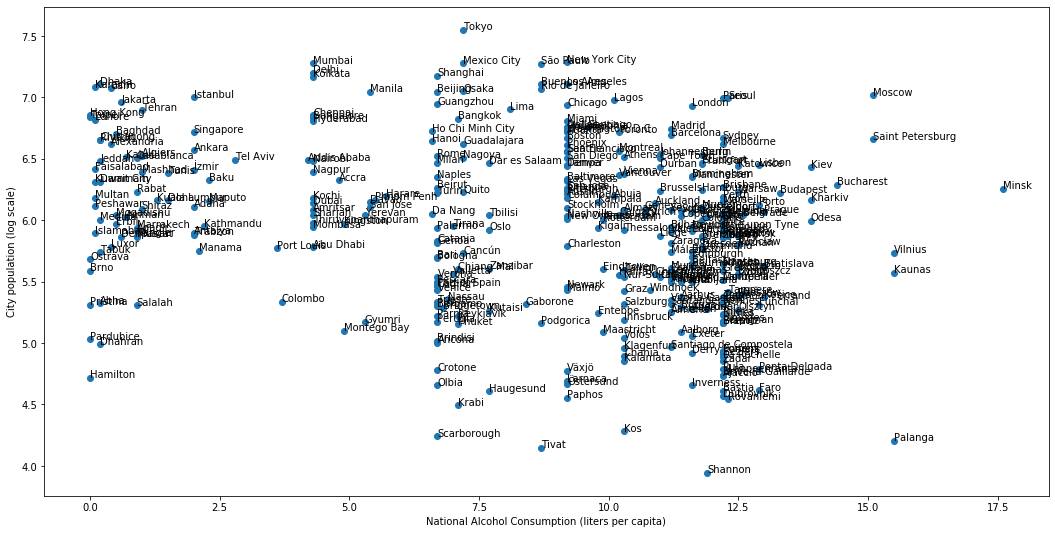

In [79]:
# how does this data look like?
plt.figure(figsize=(18, 9))
x = alcohol_score
y = np.log10(all_populations)
plt.scatter(x, y, linewidth=1)
cities = [dest[1] for dest in all_destinations]
plt.xlabel('National Alcohol Consumption (liters per capita)')
plt.ylabel('City population (log scale)')
for i, txt in enumerate(cities):
    plt.annotate(txt, (x[i], y[i]))
plt.show()

In [80]:
# we measure a city's nightlife score by multiplying
# alcohol consumption with sigmoid transform of log population
log_population = np.log10(all_populations)
nightlife_score = []
assert len(log_population) == len(alcohol_score)
for i in range(len(log_population)):
    nightlife_score.append(log_population[i] * alcohol_score[i])
normalised_nightlife_score = []
max_nightlife = max([i for i in nightlife_score if not isinstance(i, str)])
min_nightlife = min([i for i in nightlife_score if not isinstance(i, str)])
for val in nightlife_score:
    normalised_nightlife_score.append(normalise_feature(max_nightlife, min_nightlife, val))

In [81]:
# updating dataframe
dest_df['Nightlife'] = normalised_nightlife_score
# reorganise
dest_df = dest_df[dest_df.Nightlife != 'unknown']
dest_df.reset_index(inplace=True)
dest_df.drop(columns='index', inplace=True)
number_of_destinations = len(dest_df)
print(f'Number of destinations: {number_of_destinations}')
pd.set_option('display.max_rows', number_of_destinations)
dest_df.head(5)

Number of destinations: 353


/home/sihao/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Country,City,Location,Cost,History_and_Culture,Water,Mountain,Nightlife
0,Afghanistan,Kabul,"34.5167, 69.1833",6.45769,11.920292,0,100,4.141920
1,Albania,Tirana,"41.3275, 19.8189",18.1116,26.894142,50,100,37.837105
2,Algeria,Algiers,"36.7631, 3.0506",10.6279,50.000000,100,75,5.926188
3,Argentina,Buenos Aires,"-34.6025, -58.3975",11.268,26.894142,100,0,56.152034
4,Armenia,Gyumri,"40.7894, 43.8475",13.0472,88.079708,50,75,24.890845


In [82]:
# saving model
dest_df.to_csv('./data.csv')

## Principal Component Analysis

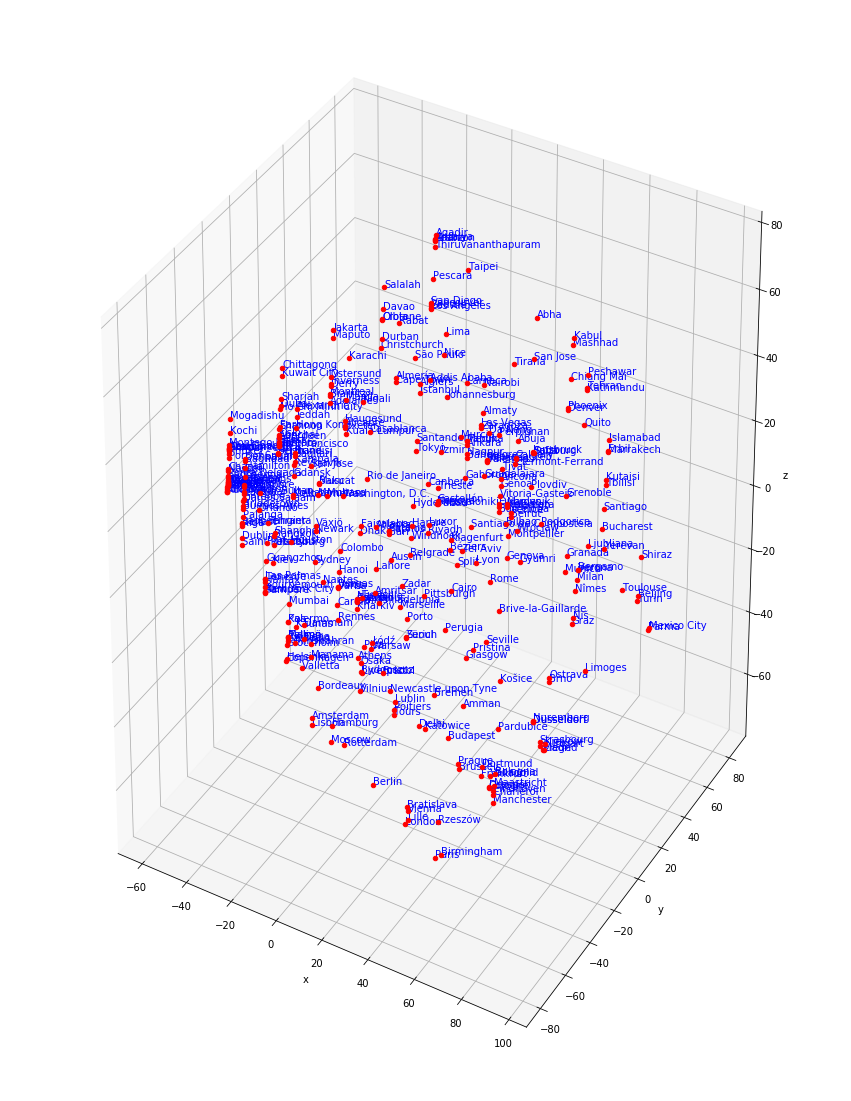

In [85]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(3)
data = dest_df[['Cost', 'History_and_Culture','Water','Mountain','Nightlife']].to_numpy()
names = dest_df['City'].tolist()
transform = pca.fit_transform(data)


fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(transform)): # plot each point + it's index as text above
    x = transform[i][0]
    y = transform[i][1]
    z = transform[i][2]
    label = names[i]
    ax.scatter(x, y, z, color='r')
    ax.text(x, y, z, '%s' % (label), size=10, zorder=1, color='b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()